<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/07_bagging_sklearn_cassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging with sklearn classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Generate a classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

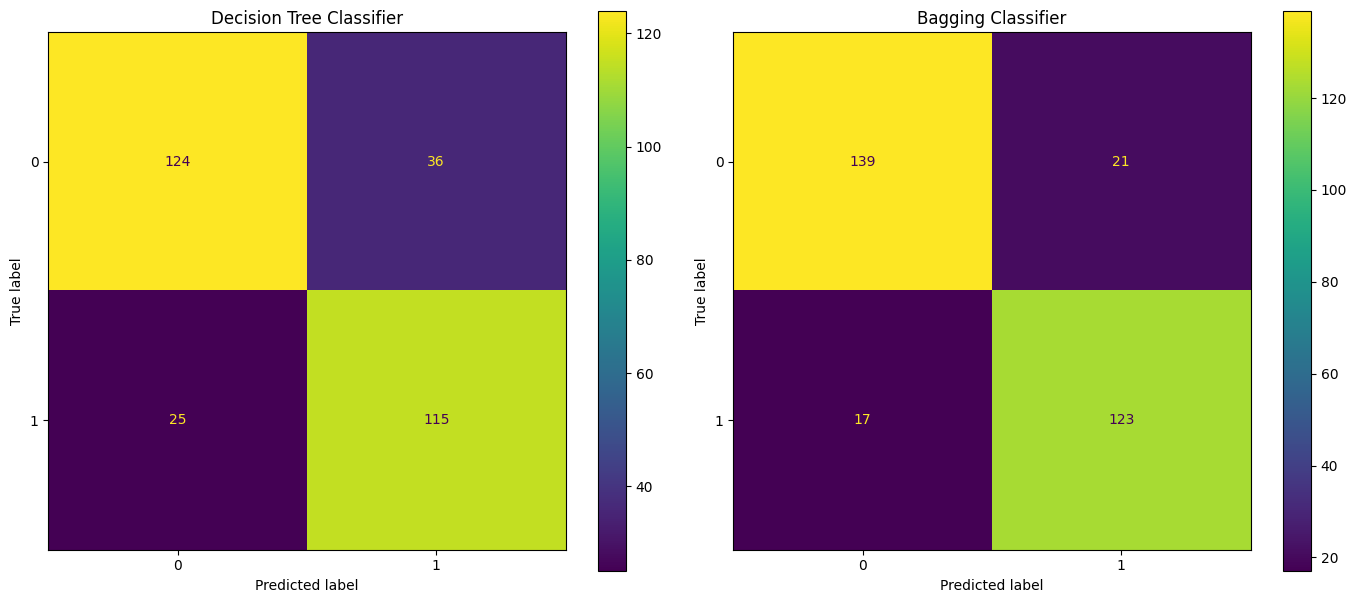

Accuracy (Decision Tree): 0.7967
Accuracy (Bagging Classifier): 0.8733


In [4]:
# Train a single Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Train a Bagging Classifier with Decision Tree as base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, ax=axes[0])
axes[0].set_title("Decision Tree Classifier")

# Confusion Matrix for Bagging Classifier
ConfusionMatrixDisplay.from_estimator(bagging, X_test, y_test, ax=axes[1])
axes[1].set_title("Bagging Classifier")

plt.tight_layout()
plt.show()

# Compare accuracy
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")
print(f"Accuracy (Bagging Classifier): {accuracy_bagging:.4f}")
